# Title: Bank Marketing (with social/economic context)

# Initializing and importing modules for exploratory analysis

In this section we load the main Python libraries for database manipulation and visualization. These are the libraries: Numpy, Pandas, Matplotlib and Seaborn.

In [1]:
import numpy as np   #Importing Numpy
import pandas as pd  #Importing Pandas

#Data visualization
import matplotlib    #Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)                #Use big fonts and big plots
plt.rcParams['figure.figsize'] = (10.0,10.0)    
matplotlib.rc('figure', facecolor='white')

import seaborn as sns #Importing Seaborn

# Loading the database for exploratory analysis

We use the Pandas library to visualize the first rows and the columns of the database under study. The database is stored in the same folder as the project, to we only have to call it using the basic command pandas.read_csv("path/to/file"). We print the header of the database, showing the first 5 rows and the columns.

In [2]:
dataframe = pd.read_csv('bank.csv') #Importing the database
dataframe.head() #Visualize the first 5 rows and the colunms of the database

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Exploratory analysis

First we are going to check if there are missing values within the columns of the database. To that end, we build the function "check_missing_values" that takes as argument the database and gives as a result, the list of the columns with the missing percent of the values, let's say, the appearance frequency of the NaN symbol.

In [3]:
def check_missing_values(df,cols=None,axis=0):
    ### This function check out for missing values in each column
    ## Arguments:
                #df: data frame
                #cols: list. List of column names
                #axis: int. 0 means column and 1 means row
    
    # This function returns the missing info as a dataframe 
    
    if cols != None:
        df = df[cols]
    missing_num = df.isnull().sum(axis).to_frame().rename(columns={0:'missing_num'})
    missing_num['missing_percent'] = df.isnull().mean(axis)*100
    return missing_num.sort_values(by='missing_percent',ascending = False) 


print("We can see that there are no missing values within the database.")
check_missing_values(dataframe,cols=None,axis=0)

We can see that there are no missing values within the database.


,missing_num,missing_percent
age,0,0.0
campaign,0,0.0
nr_employed,0,0.0
euribor3m,0,0.0
cons_conf_idx,0,0.0
cons_price_idx,0,0.0
emp_var_rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


,0,1
y,0.887346,0.112654


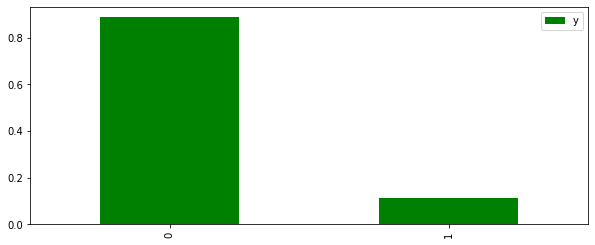

In [4]:
loan = dataframe["y"].value_counts(normalize=True).to_frame()
plt.rcParams['figure.figsize'] = (10.0, 4.0)    # ... and big plots
loan.plot.bar(color='g')
loan.T

In [5]:
### We can see that there are many cathegorical variables in the databases what could teach us about
### what is going on with the frauds.
### We are going to build a function that graphs which of these categorical variables have more in common
### with the credit card frauds.

def compare_category(df,colname,targetname):
    ### This function checks the target value difference of a given cathegory in the case
    ### of binary classifications.
    
    ## Arguments:
    # df: is a data frame.
    # colname: is a string. The column name to be evaluated.
    # targetname: is a string. The column name of the target variable.
    
    # caculate aggregate stats
    df_cate = df.groupby([colname])[targetname].agg(['count', 'sum', 'mean'])
    df_cate.reset_index(inplace=True)
    #print(df_cate)
    
    # plot visuals
    f, ax = plt.subplots(figsize=(20, 8))
    plt1 = sns.lineplot(x=colname, y="mean", data=df_cate,color="b")
    plt.xticks(size=20,rotation=90)
    plt.yticks(size=20,rotation=0)
    
    for tl in ax.get_yticklabels():
        tl.set_color('b')

    ax2 = ax.twinx()
    plt2 = sns.barplot(x=colname, y="count", data=df_cate,
                       ax=ax2,alpha=0.5)   
    
    
#MERGING BOTH DATABASES FOR EASIER ANALYSIS
#dataset_train_identity_transaction = pd.concat([dataset_train_identity,dataset_train_transaction],sort=True)

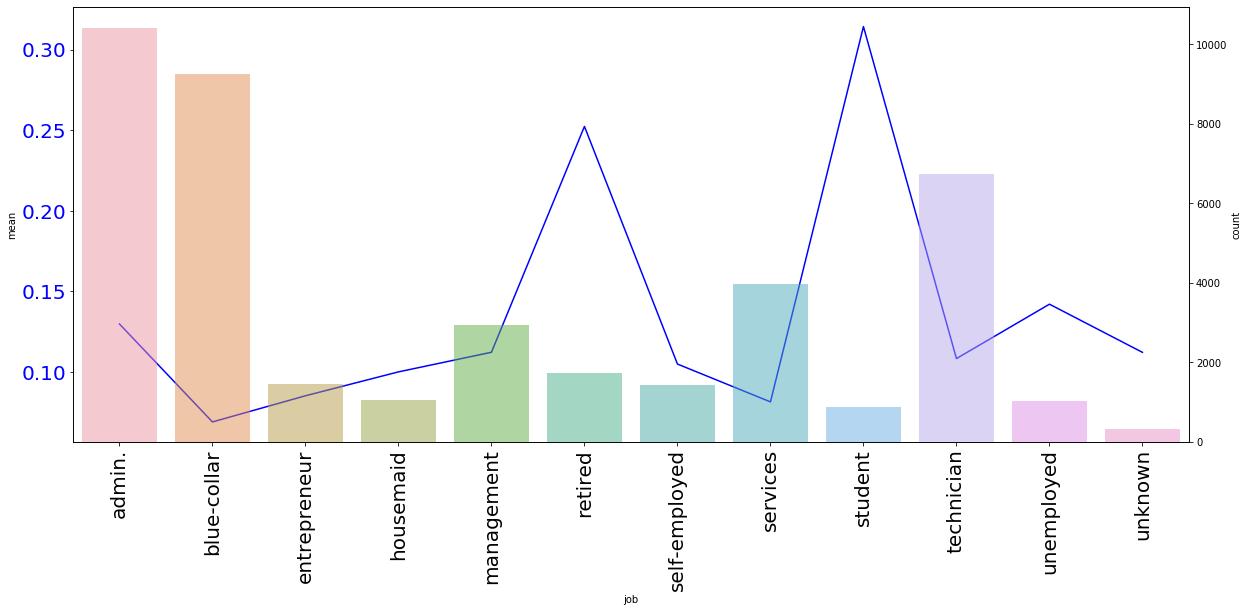

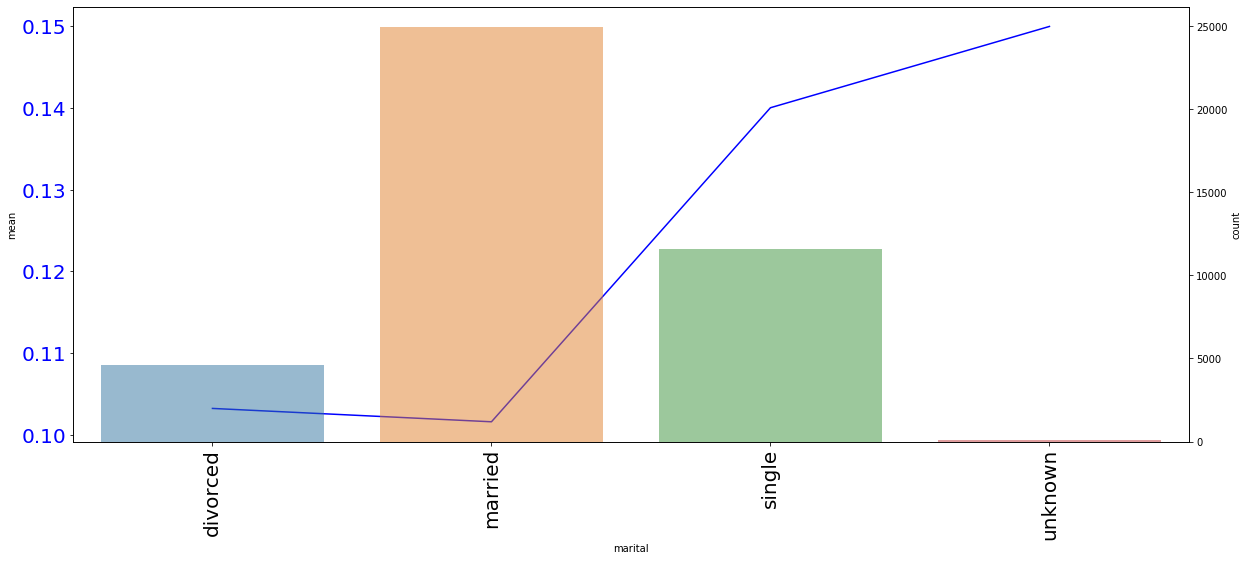

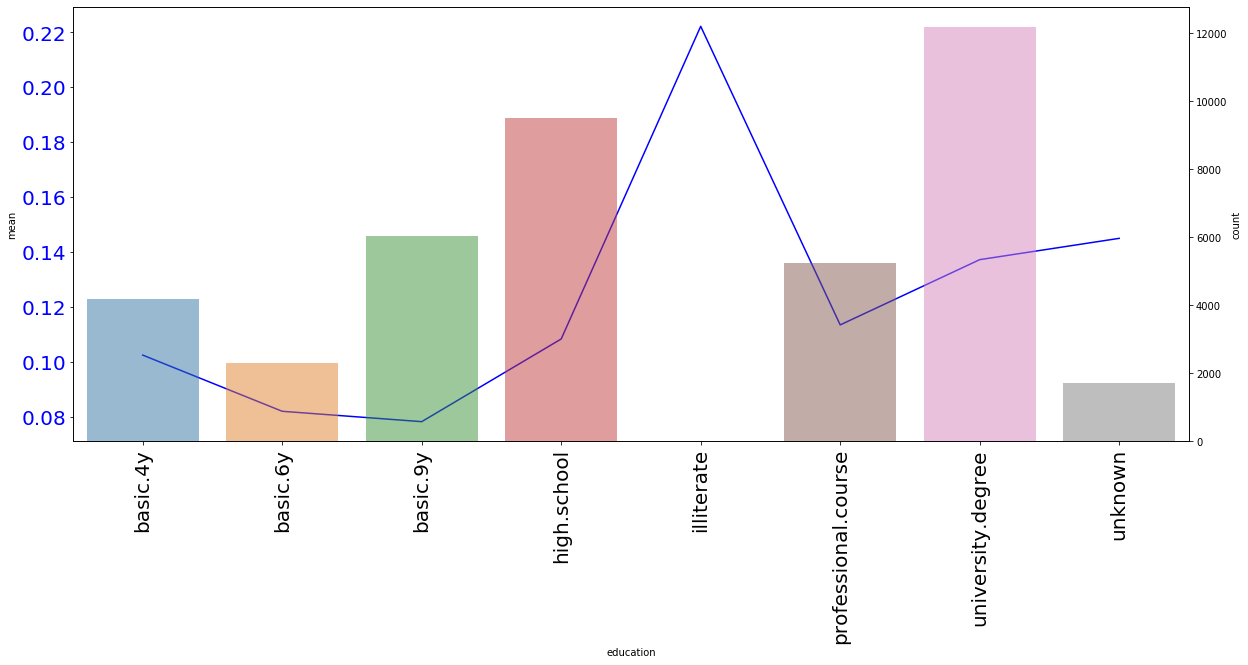

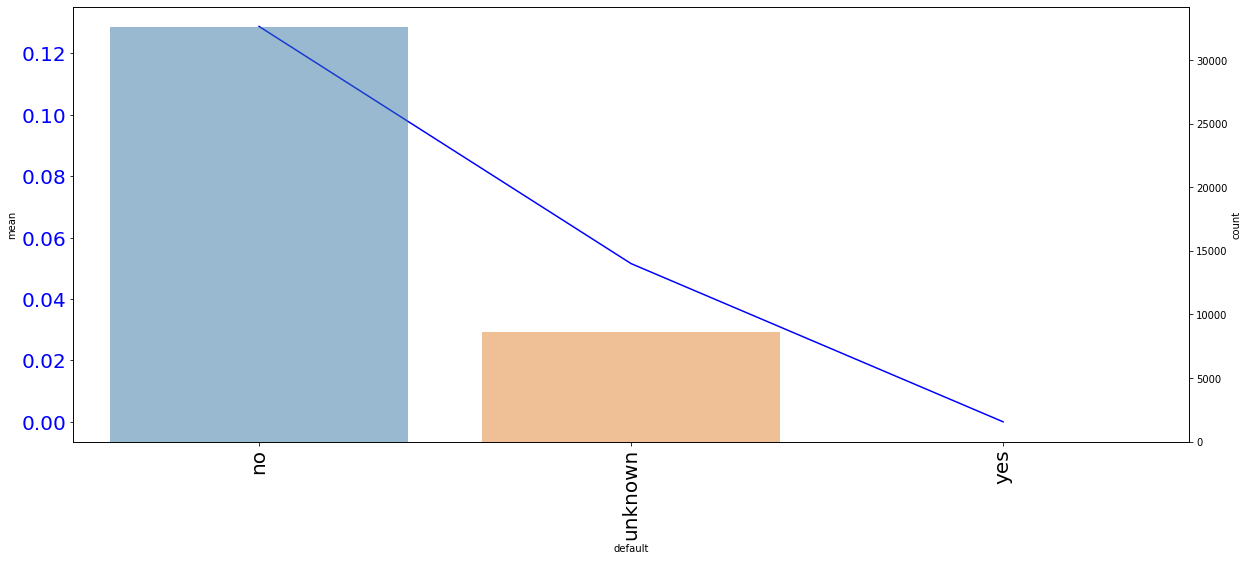

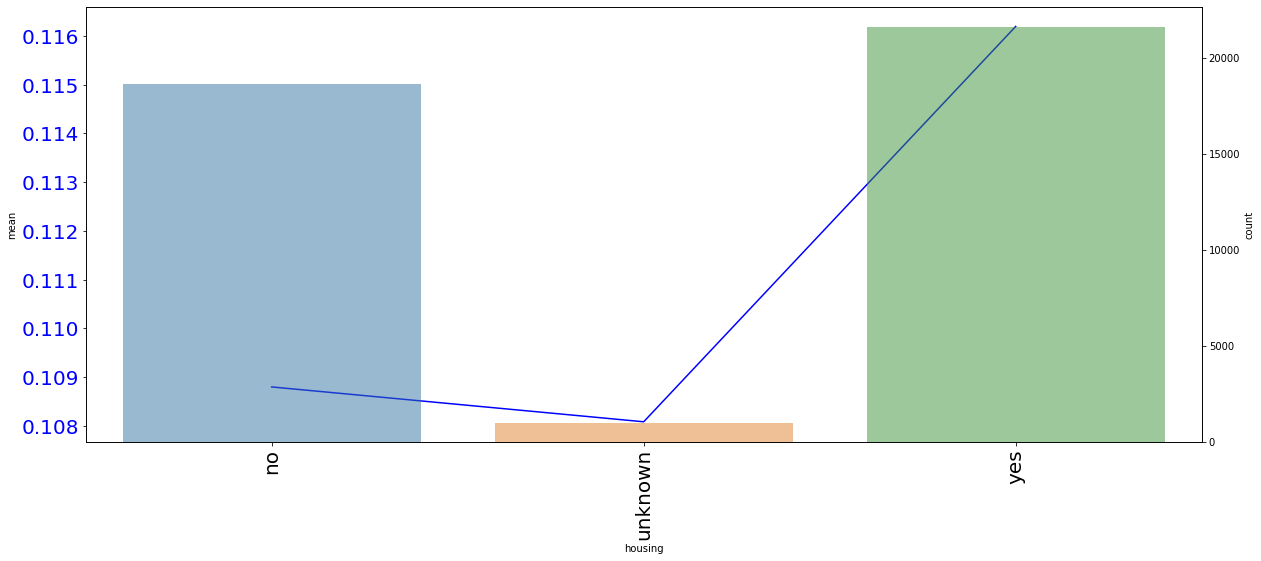

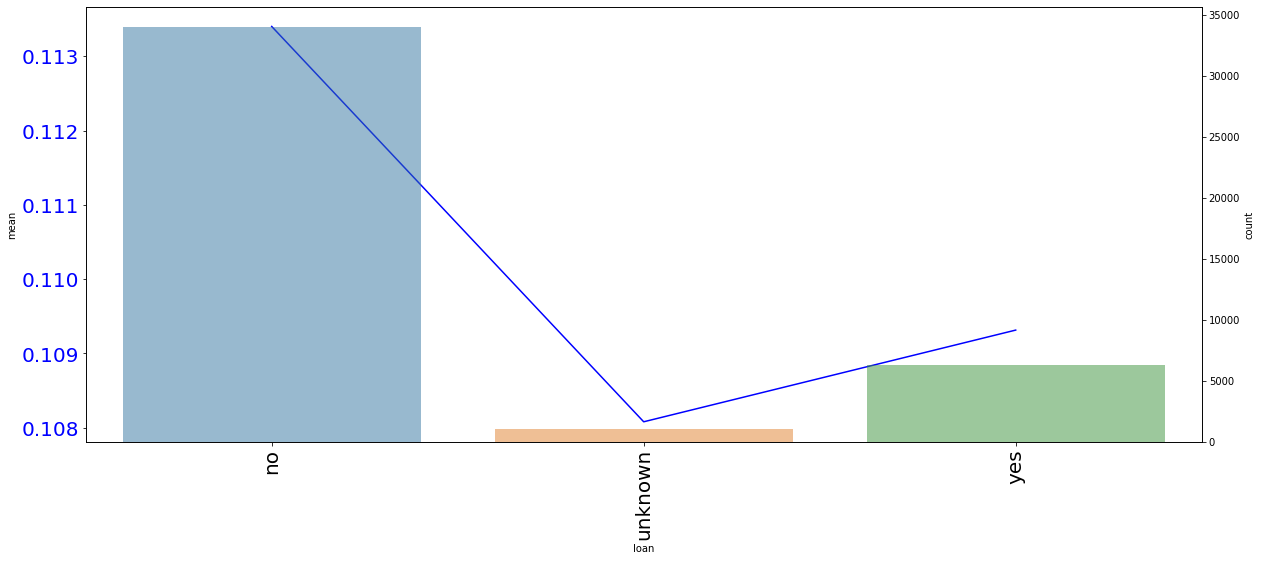

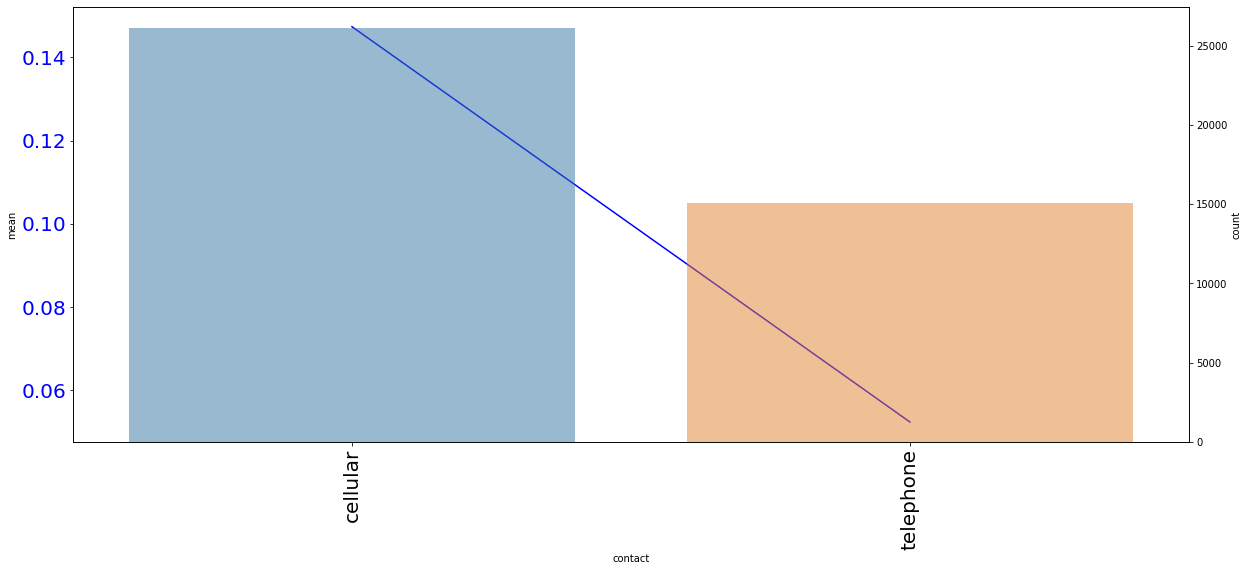

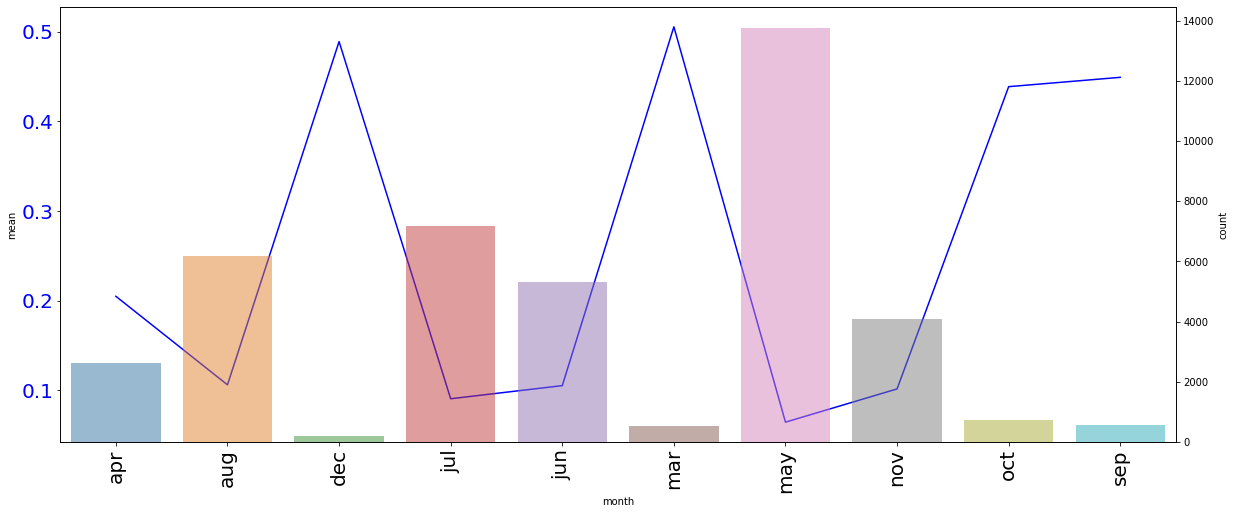

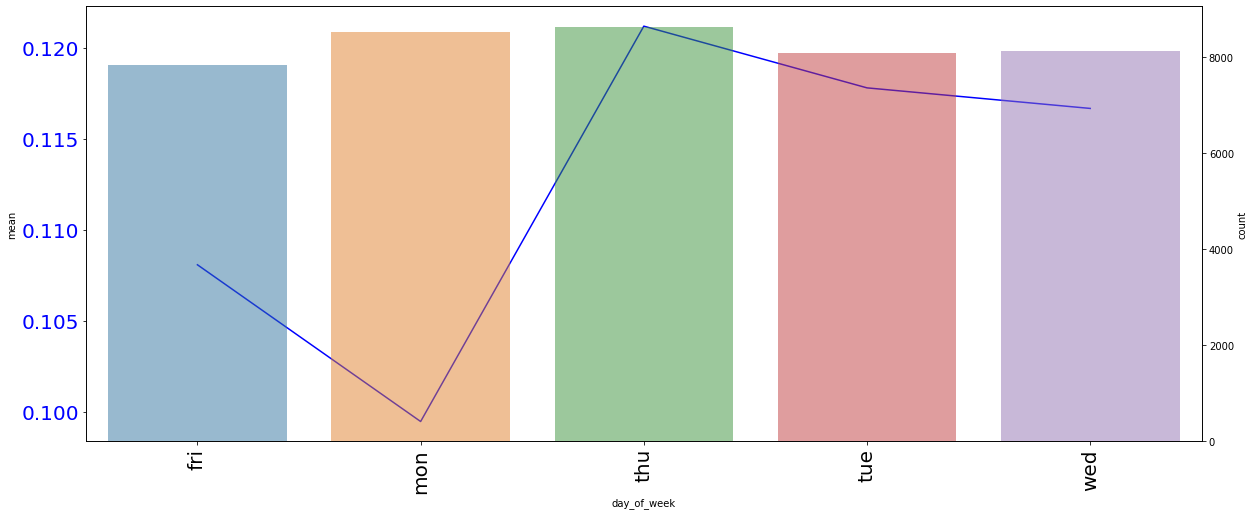

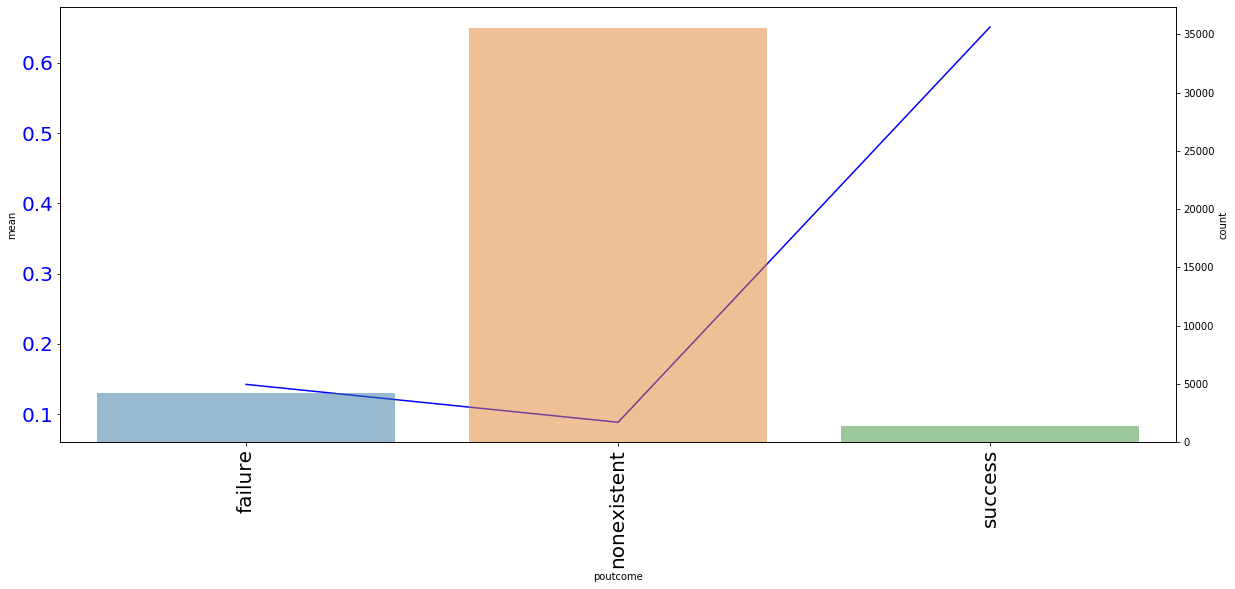

In [6]:
cat_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for el in cat_vars:
    compare_category(dataframe,el,"y")

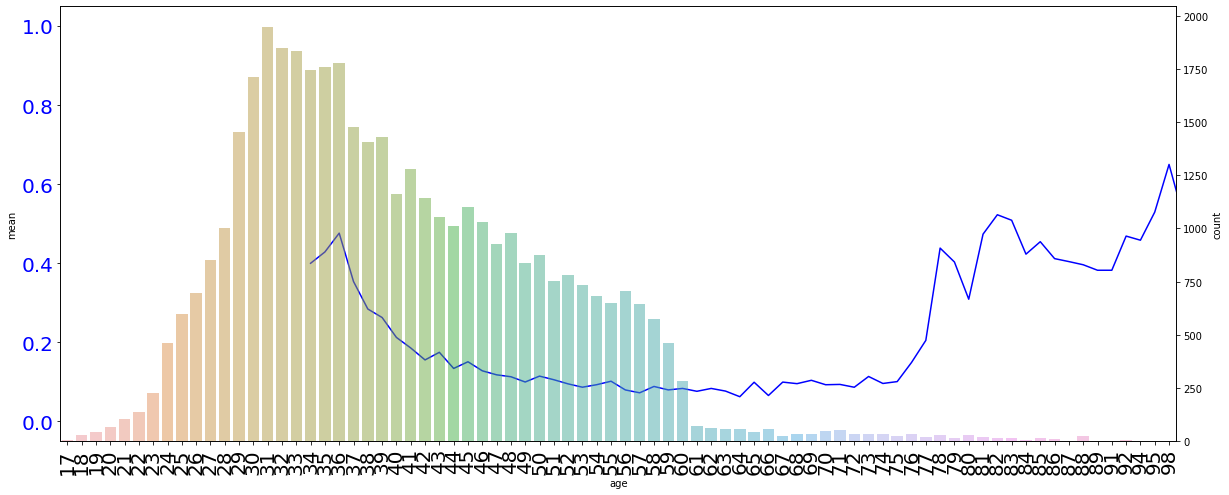

In [7]:
compare_category(dataframe,"age","y")

In [8]:
dataframe['job'] = dataframe['job'].replace(["admin.", "blue-collar", "entrepreneur", "technician", "services", "management", "self-employed"], 'employed')
dataframe['job'] = dataframe['job'].replace(["retired", "housemaid", "student"], 'unemployed')

In [9]:
dataframe['job'].value_counts()

employed      36189
unemployed     4669
unknown         330
Name: job, dtype: int64

In [10]:
dataframe["education"] = dataframe["education"].replace(["university.degree", "high.school", "basic.9y", "professional.course", "basic.4y", "basic.6y"],"literate")

In [11]:
dataframe["education"].value_counts()

literate      39439
unknown        1731
illiterate       18
Name: education, dtype: int64

In [11]:
dataframe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,employed,married,literate,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,employed,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,employed,single,literate,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,employed,married,literate,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,unemployed,married,literate,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,unemployed,married,literate,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,unemployed,married,literate,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,employed,single,literate,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,employed,married,literate,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [12]:
dataframe['job'] = dataframe['job'].map( {"employed":1, "unemployed":0, "unknown":-1 })
dataframe['marital'] = dataframe['marital'].map( {"married":2, "single":1, "divorced":0, "unknown":-1 })
dataframe['education'] = dataframe['education'].map({"literate":1, "illiterate":0, "unknown":-1})
dataframe['default'] = dataframe['default'].map({"yes":1, "no":0, "unknown":-1})
dataframe['housing'] = dataframe['housing'].map({"yes":1, "no":0, "unknown":-1})
dataframe['loan'] = dataframe['loan'].map({"yes":1, "no":0, "unknown":-1})
dataframe['contact'] = dataframe['contact'].map({"cellular":1, "telephone":0})
dataframe['month'] = dataframe['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
dataframe['day_of_week'] = dataframe['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})
dataframe['poutcome'] = dataframe['poutcome'].map({'success':1, 'failure':0, 'nonexistent':-1})

In [13]:
dataframe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,2,1,-1,1,0,1,8,4,...,1,999,0,-1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,1,2,-1,0,0,0,1,11,5,...,1,999,0,-1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,1,1,1,0,1,0,1,6,4,...,3,6,2,1,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,1,2,1,0,0,0,1,4,5,...,2,999,0,-1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,0,2,1,0,1,0,1,8,5,...,1,3,1,1,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,0,2,1,-1,0,1,0,6,4,...,1,999,0,-1,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,0,2,1,-1,0,0,0,5,4,...,2,999,0,-1,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,1,1,1,-1,1,1,0,5,3,...,3,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,1,2,1,0,0,1,0,10,2,...,2,999,0,-1,-3.4,92.431,-26.9,0.742,5017.5,0


# Correlation matrix

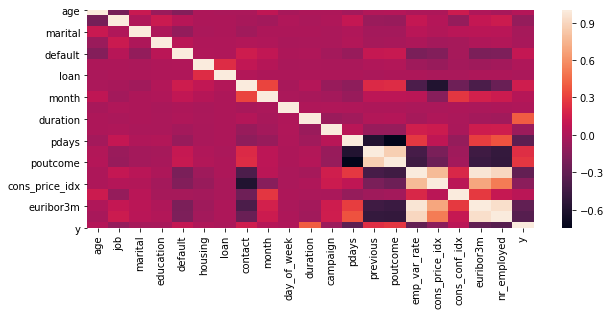

In [14]:
#Now we check for correlations between the columns and we make a heatmap plot
sns.heatmap(dataframe.corr(),annot=False)
plt.rcParams['figure.figsize'] = (50.0, 50.0)    # ... and big plots
# We see no visible correlations among the columns, so we proceed with the analysis

# Delete correlated columns from the database

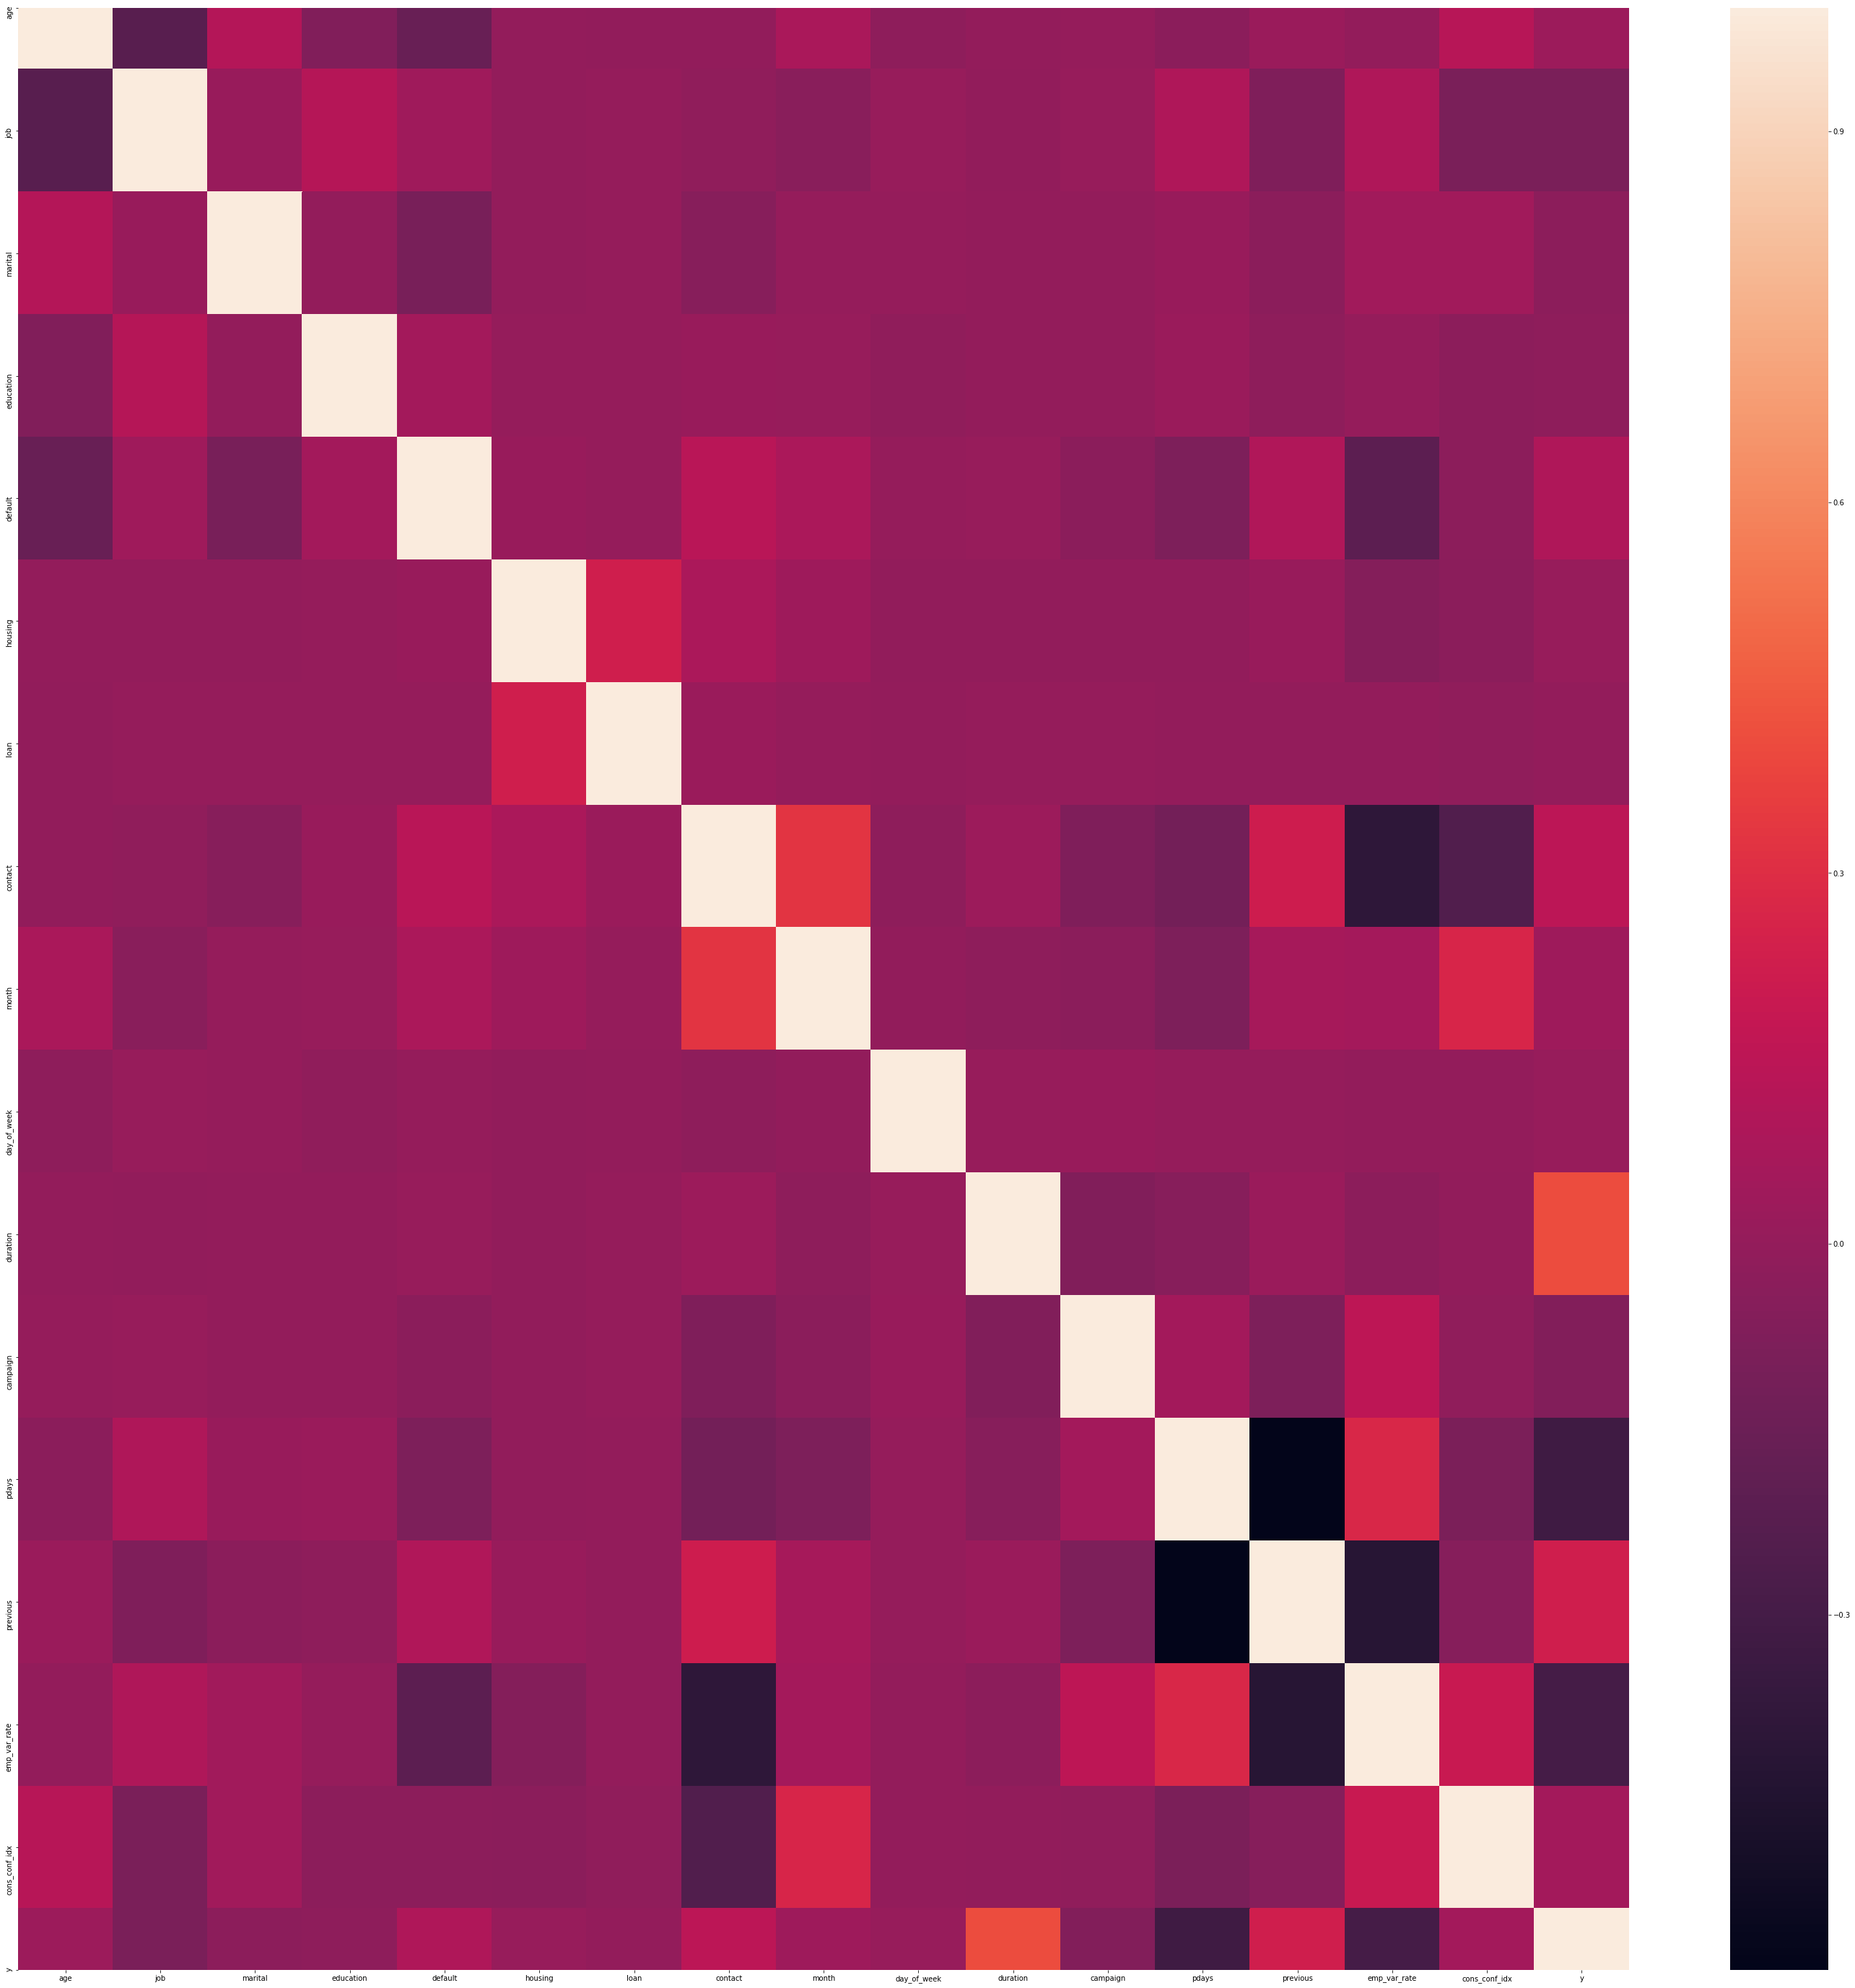

In [17]:
corr_matrix = dataframe.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in dataframe.columns if any(upper[column]>0.75)]
dataframe=dataframe.drop(to_drop,axis=1)    

sns.heatmap(dataframe.corr(),annot=False)
plt.rcParams['figure.figsize'] = (50.0, 50.0)    # ... and big plots

In [18]:
dataframe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_conf_idx,y
0,44,1,2,1,-1,1,0,1,8,4,210,1,999,0,1.4,-36.1,0
1,53,1,2,-1,0,0,0,1,11,5,138,1,999,0,-0.1,-42.0,0
2,28,1,1,1,0,1,0,1,6,4,339,3,6,2,-1.7,-39.8,1
3,39,1,2,1,0,0,0,1,4,5,185,2,999,0,-1.8,-47.1,0
4,55,0,2,1,0,1,0,1,8,5,137,1,3,1,-2.9,-31.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,0,2,1,-1,0,1,0,6,4,222,1,999,0,1.4,-41.8,0
41184,31,0,2,1,-1,0,0,0,5,4,196,2,999,0,1.1,-36.4,0
41185,42,1,1,1,-1,1,1,0,5,3,62,3,999,0,1.1,-36.4,0
41186,48,1,2,1,0,0,1,0,10,2,200,2,999,0,-3.4,-26.9,0


# Prepare the database for further analysis

In [19]:
# Database cleaning and preparation for the analysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Evaluating the accuracy of the performed analysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [20]:
#Setting up the training and test variables. The test size is 20% of the total amount of data.
X = dataframe.iloc[:,:-1].values
Y = dataframe.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.3)

#We scale our training and test datasets to have zero mean and a standard deviation of 1.
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

The distance between the centroids are: 383.87


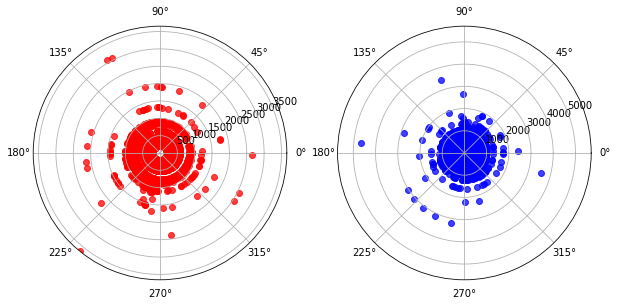

In [47]:
import scipy

def centroid_vector(t_array):
    return sum(t_array)/len(t_array)
    

def euclidean_distance(point,t_array):
    result =[]
    for el in t_array:
        result.append(scipy.spatial.distance.euclidean(point, el))
    return result

def angular_distribution(point,t_array):
    result = []
    for el in t_array:
        result.append((180.0/np.pi)*np.arccos(sum((a*b) for a, b in zip(point, el))/(np.linalg.norm(point)*np.linalg.norm(el))))
        
    return result


fraud = dataframe[dataframe["y"]==1]
notfraud = dataframe[dataframe["y"]==0]

print("The distance between the centroids are:", round(scipy.spatial.distance.euclidean(centroid_vector(fraud.values), centroid_vector(notfraud.values)),2))


theta_fraud = angular_distribution(centroid_vector(fraud.values),fraud.values)
theta_notfraud = angular_distribution(centroid_vector(notfraud.values),notfraud.values)

r_fraud = euclidean_distance(centroid_vector(fraud.values),fraud.values)
r_notfraud = euclidean_distance(centroid_vector(notfraud.values),notfraud.values)

fig = plt.figure()
ax1 = fig.add_subplot(121, polar=True)
c_fraud = ax1.scatter(theta_fraud, r_fraud, c='r', cmap='hsv', alpha=0.75)
ax1.set_thetamin(0)
ax1.set_thetamax(360)

ax2 = fig.add_subplot(122, polar=True)
c_notfraud = ax2.scatter(theta_notfraud, r_notfraud, c='b', cmap='hsv', alpha=0.75)
ax2.set_thetamin(0)
ax2.set_thetamax(360)

plt.rcParams['figure.figsize'] = (20.0, 20.0)    # ... and big plots
#ax3 = ax2.twinx()

#plt.show()

# Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[10700   281]
 [  862   514]]
The log determinant is: 6.720785724481194
The accuracy goal is: 90.75 %


Text(69.0, 0.5, 'Actual')

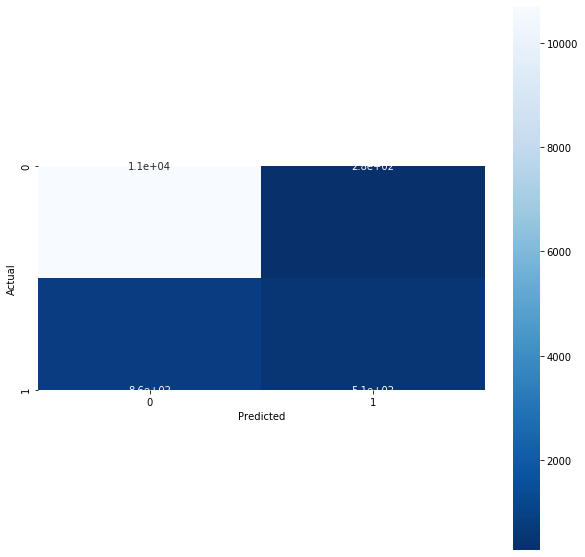

In [23]:
from sklearn.linear_model import LogisticRegression

#Now it is time to start classifying our target data using the Logisitic Regression algorithm.
Log_Classifier = LogisticRegression()
Log_Classifier.fit(X_train,Y_train)
Y_pred_log = Log_Classifier.predict(X_test)

c_matrix_log = confusion_matrix(Y_test,Y_pred_log)
accgoal_log = accuracy_score(Y_test, Y_pred_log)
print(c_matrix_log)
print('The log determinant is:', np.log10(np.linalg.det(c_matrix_log)))
print("The accuracy goal is:",round(accgoal_log*100,2),"%")

sns.heatmap(c_matrix_log, annot=True, square=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# kNN Algorithm

The k parameter is: 11
[[10666   315]
 [  872   504]]
The log determinant is: 6.707653961303661
The accuracy goal is: 90.39 %


Text(69.0, 0.5, 'Actual')

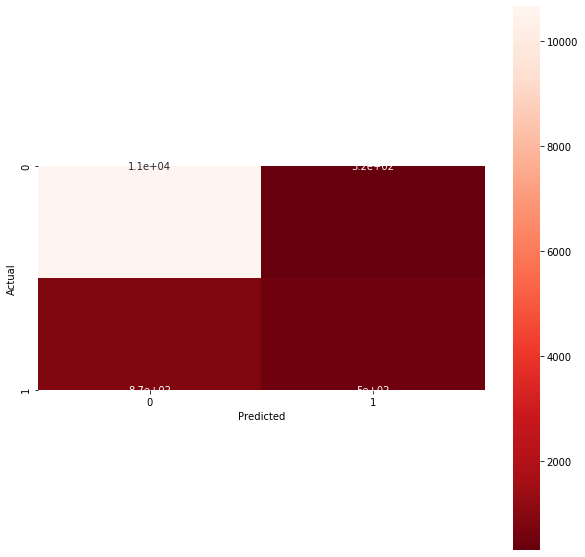

In [24]:
from sklearn.neighbors import KNeighborsClassifier

### We will repeat the same analysis but now with the KNN algorithm

kNN = 11 #I will use this parameter and we see that the accuracy is better than the Logistic regression.
print('The k parameter is:', kNN)
classifier = KNeighborsClassifier(n_neighbors = kNN, p = 2, metric = 'euclidean' )
classifier.fit(X_train, Y_train)
Y_pred_knn = classifier.predict(X_test)

c_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
accgoaal_knn = accuracy_score(Y_test, Y_pred_knn)
print(c_matrix_knn)
print('The log determinant is:', np.log10(np.linalg.det(c_matrix_knn)))
print("The accuracy goal is:",round(accgoaal_knn*100,2),"%")


sns.heatmap(c_matrix_knn, annot=True, square=True, cmap = 'Reds_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Light Gradient Boosting algorithm

[[10053   928]
 [  360  1016]]
The log determinant is: 6.994746746459815
The accuracy goal is: 89.58 %
-----------------------


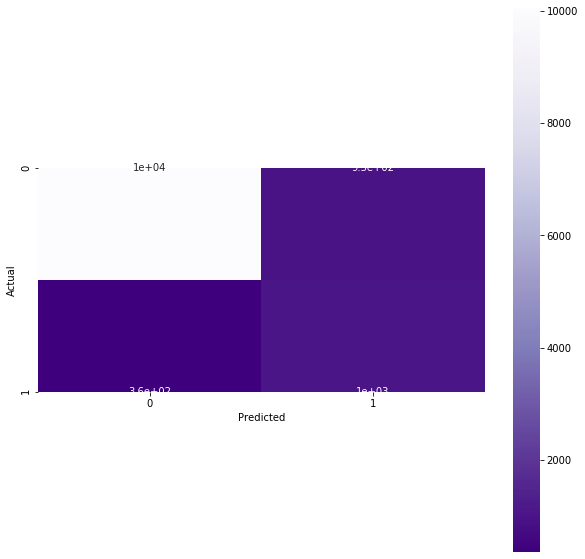

In [25]:
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# For this task we use a simple set of parameters to train the model. 
# We just want to create a baseline model, so we are not performing here cross validation or parameter tunning.

lgb_train = lgb.Dataset(X_train, Y_train, free_raw_data=False)
lgb_test = lgb.Dataset(X_test, Y_test, reference=lgb_train, free_raw_data=False)

parameters = {'num_leaves': 2**8,
              'learning_rate': 0.1,
              'is_unbalance': True,
              'min_split_gain': 0.1,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 300


clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)

Y_prob_gb = clf.predict(X_test)

Y_pred_gb = np.where(Y_prob_gb > 0.5, 1, 0)
cmatrix_gb = confusion_matrix(Y_test,Y_pred_gb)
accgoal_gb = accuracy_score(Y_test, Y_pred_gb)
print(cmatrix_gb)
print('The log determinant is:', np.log10(np.linalg.det(cmatrix_gb)))
print("The accuracy goal is:", round(accgoal_gb*100,2),'%')


plt.figure()
sns.heatmap(cmatrix_gb, annot=True, square=True, cmap = 'Purples_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (5.0, 5.0)    # ... and big plots
print('-----------------------')

# Random Forest algorithm

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[10862   119]
 [ 1051   325]]
The log determinant is: 6.532127447360295
The accuracy goal is: 90.53 %


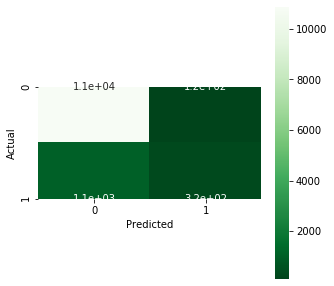

In [26]:
from sklearn.ensemble import RandomForestClassifier

classif_rmd = RandomForestClassifier(min_samples_leaf=150)
classif_rmd.fit(X_train, Y_train)
Y_pred_rmf = classif_rmd.predict(X_test)
accgoal_rmf = accuracy_score(Y_pred_rmf, Y_test)
cmatrix_rmf = confusion_matrix(Y_test, Y_pred_rmf)
print(cmatrix_rmf)
print('The log determinant is:', np.log10(np.linalg.det(cmatrix_rmf)))
print("The accuracy goal is:", round(accgoal_rmf*100,2),'%')


sns.heatmap(cmatrix_rmf, annot=True, square=True, cmap = 'Greens_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (5.0, 5.0)    # ... and big plots

# Empirical sigmoid function

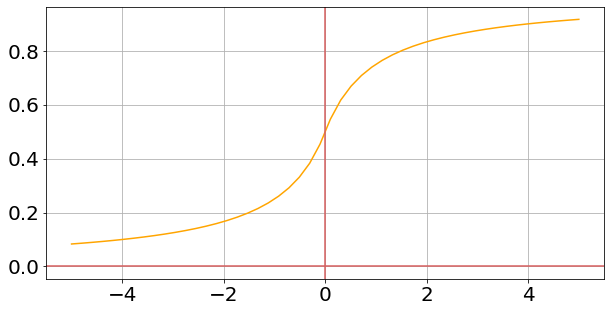

In [69]:
def empirical_sigmoid(x):
    return 0.5*(1.0 + x/(1.0+np.abs(x)))

xsig = np.linspace(-5,5,50)
ysig = empirical_sigmoid(xsig)

# plot visuals
f, ax = plt.subplots(figsize=(10, 5))
plt1 = plt.plot(xsig, ysig, color="orange")
plt.xticks(size=20,rotation=0)
plt.yticks(size=20,rotation=0)
ax.grid(True, which='both')
ax.axhline(y=0, color='r')
ax.axvline(x=0, color='r')

CPU times: user 1h 30min 33s, sys: 43min 26s, total: 2h 14min
Wall time: 38min 5s
[[10617   364]
 [  818   558]]
The log determinant is: 6.7502409475675105
The accuracy goal is: 90.43 %


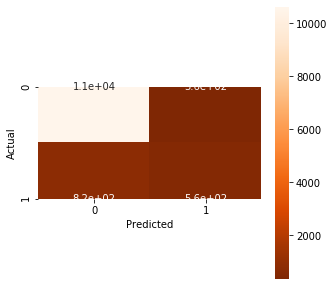

In [27]:
class Empirical_Classifier:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __empirical_class(self, z):
        return 0.5*(1.0 + z/(1.0+np.abs(z)))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__empirical_class(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__empirical_class(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print('floss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__empirical_class(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

model = Empirical_Classifier(lr=0.1, num_iter=300000)
%time model.fit(X_train, Y_train)
Y_pred_emp = model.predict(X_test)
params = model.theta

accgoal_emp = accuracy_score(Y_pred_emp, Y_test)
c_matrix_emp = confusion_matrix(Y_test, Y_pred_emp)
print(c_matrix_emp)
print('The log determinant is:', np.log10(np.linalg.det(c_matrix_emp)))
print("The accuracy goal is:", round(accgoal_emp*100,2),'%')

sns.heatmap(c_matrix_emp, annot=True, square=True, cmap = 'Oranges_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (8.0, 8.0)    # ... and big plots

# Artificial Neural Networks

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/150
28831/28831 [==============================] - 2s 66us/step - loss: 0.2700 - accuracy: 0.8945
Epoch 2/150
28831/28831 [==============================] - 1s 42us/step - loss: 0.2032 - accuracy: 0.9072
Epoch 3/150
28831/28831 [==============================] - 1s 41us/step - loss: 0.1999 - accuracy: 0.9093
Epoch 4/150
28831/28831 [==============================] - 1s 40us/step - loss: 0.1975 - accuracy: 0.9110
Epoch 5/150
28831/28831 [==============================] - 1s 40us/step - loss: 0.1954 - accuracy: 0.9110
Epoch 6/150
28831/28831 [==============================] - 1s 40us/step - loss: 0.1937 - accuracy: 0.9120
Epoch 7/150
28831/28831 [==============================] - 1s 41us/step - loss: 0.1925 - accuracy: 0.9118
Epoch 8/150
28831/28831 [==============================] - 1s 41us/step - loss: 0.1908 - accuracy: 0.9126
Epoch 9/150
28831/28831 [==============================] 

28831/28831 [==============================] - 1s 43us/step - loss: 0.1694 - accuracy: 0.9196
Epoch 149/150
28831/28831 [==============================] - 1s 41us/step - loss: 0.1693 - accuracy: 0.9192
Epoch 150/150
28831/28831 [==============================] - 1s 41us/step - loss: 0.1695 - accuracy: 0.9196
[[10518   463]
 [  630   746]]
The log determinant is: 6.878219407506641
The accuracy goal is: 91.15 %


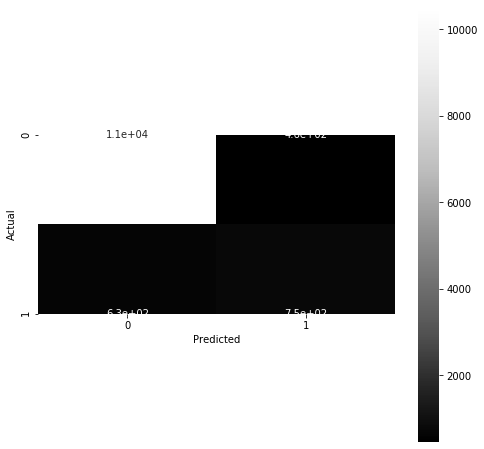

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense# Initialising the ANN
"Activation functions: 'sigmoid', 'tanh', 'relu'"
classifier = Sequential()# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 32, epochs = 150)

# Predicting the Test set results
Y_pred_ann = classifier.predict(X_test)
Y_pred_ann = (Y_pred_ann > 0.5)
accgoal_ann = accuracy_score(Y_pred_ann, Y_test)

cmatrix_ann = confusion_matrix(Y_test, Y_pred_ann) # rows = truth, cols = prediction
print(cmatrix_ann)
print('The log determinant is:', np.log10(np.linalg.det(cmatrix_ann)))
print("The accuracy goal is:", round(accgoal_ann*100,2),'%')


sns.heatmap(cmatrix_ann, annot=True, square=True, cmap = 'Greys_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (8.0, 8.0)    # ... and big plots

# Comparison between the different classification algorithms

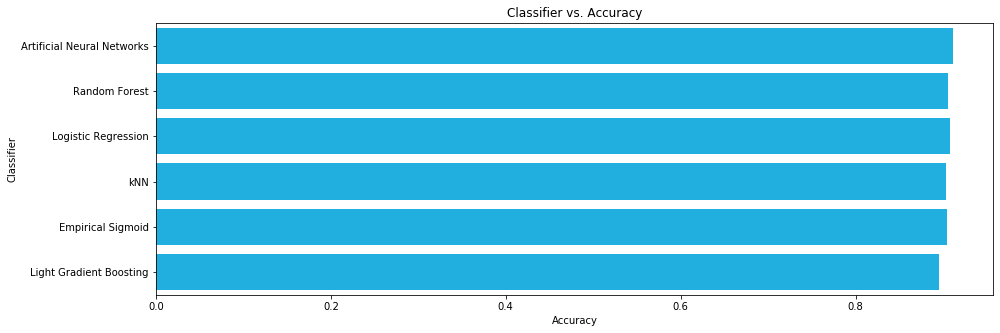

In [39]:
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
log_entry = pd.DataFrame([['Artificial Neural Networks',accgoal_ann],['Random Forest', accgoal_rmf],['Logistic Regression',accgoal_log],['kNN',accgoaal_knn],['Empirical Sigmoid', accgoal_emp], ['Light Gradient Boosting',accgoal_gb]], columns=log_cols)
        #metric_entry = pd.DataFrame([[precision,recall,f1_score,roc_auc]], columns=metrics_cols)
log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier vs. Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="deepskyblue")  
plt.rcParams['figure.figsize'] = (15.0, 5.0)    # ... and big plots
plt.show()

# SMOTE: Generate synthetic samples

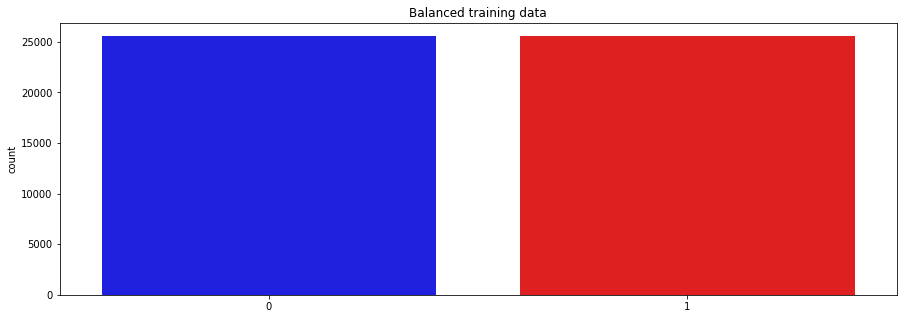

In [53]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='all', random_state=None, ratio=1.0)
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

sns.countplot(Y_train_smote)
plt.title('Balanced training data')
plt.rcParams['figure.figsize'] = (15.0, 5.0)
sns.set_palette(['blue', 'red'])
plt.show()

# Logistic Regression SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[9966 1015]
 [ 375 1001]]
The log determinant is: 6.982060413337964
The accuracy goal is: 88.75 %


Text(240.00000000000017, 0.5, 'Actual')

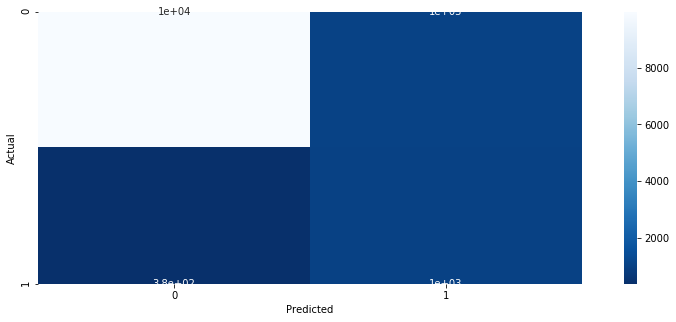

In [31]:
from sklearn.linear_model import LogisticRegression

#Now it is time to start classifying our target data using the Logisitic Regression algorithm.
Log_Classifier = LogisticRegression()
Log_Classifier.fit(X_train_smote,Y_train_smote)
Y_pred_log_smote = Log_Classifier.predict(X_test)

c_matrix_log_smote = confusion_matrix(Y_test,Y_pred_log_smote)
accgoal_log_smote = accuracy_score(Y_test, Y_pred_log_smote)
print(c_matrix_log_smote)
print('The log determinant is:', np.log10(np.linalg.det(c_matrix_log_smote)))
print("The accuracy goal is:",round(accgoal_log_smote*100,2),"%")

sns.heatmap(c_matrix_log_smote, annot=True, square=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# kNN algorithm SMOTE

The k parameter is: 11
[[10518   463]
 [  630   746]]
The log determinant is: 6.878219407506641
The accuracy goal is: 91.15 %


Text(240.00000000000017, 0.5, 'Actual')

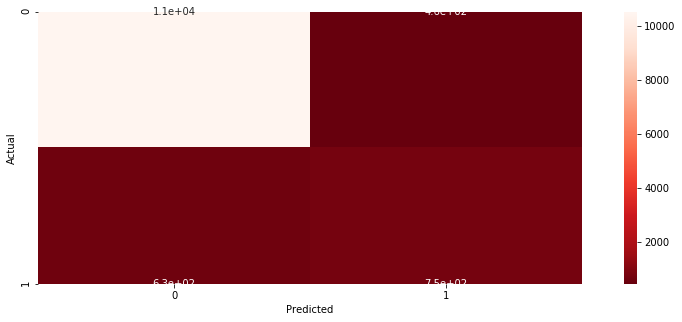

In [32]:
from sklearn.neighbors import KNeighborsClassifier

### We will repeat the same analysis but now with the KNN algorithm

kNN = 11 #I will use this parameter and we see that the accuracy is better than the Logistic regression.
print('The k parameter is:', kNN)
classifier_smote = KNeighborsClassifier(n_neighbors = kNN, p = 2, metric = 'euclidean' )
classifier_smote.fit(X_train_smote, Y_train_smote)
Y_pred_knn_smote = classifier.predict(X_test)
Y_pred_knn_smote = np.where(Y_pred_knn_smote>0.5,1.0,0.0)

c_matrix_knn_smote = confusion_matrix(Y_test, Y_pred_knn_smote)
accgoaal_knn_smote = accuracy_score(Y_test, Y_pred_knn_smote)
print(c_matrix_knn_smote)
print('The log determinant is:', np.log10(np.linalg.det(c_matrix_knn_smote)))
print("The accuracy goal is:",round(accgoaal_knn_smote*100,2),"%")


sns.heatmap(c_matrix_knn_smote, annot=True, square=True, cmap = 'Reds_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Light Grandient Boosting SMOTE

[[4853 6128]
 [  11 1365]]
The log determinant is: 6.816701010922302
The accuracy goal is: 50.32 %
-----------------------


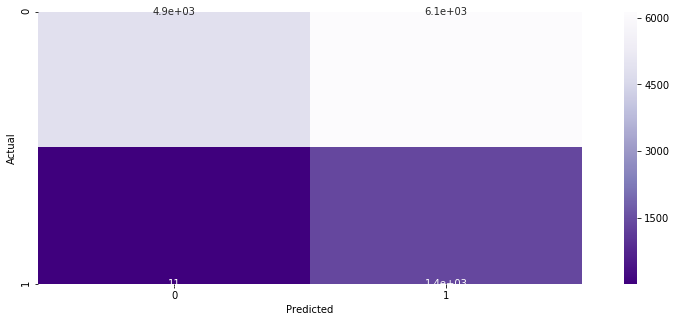

In [33]:
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# For this task we use a simple set of parameters to train the model. 
# We just want to create a baseline model, so we are not performing here cross validation or parameter tunning.

lgb_train_smote = lgb.Dataset(X_train_smote, Y_train_smote, free_raw_data=False)
lgb_test_smote = lgb.Dataset(X_test, Y_test, reference=lgb_train_smote, free_raw_data=False)

parameters = {'num_leaves': 2**8,
              'learning_rate': 0.1,
              'is_unbalance': True,
              'min_split_gain': 0.1,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 300


clf_smote = lgb.train(parameters, lgb_train_smote, num_boost_round=num_rounds)

Y_prob_gb_smote = clf_smote.predict(X_test)

Y_pred_gb_smote = np.where(Y_prob_gb_smote > 0.5, 1, 0)
cmatrix_gb_smote = confusion_matrix(Y_test,Y_pred_gb_smote)
accgoal_gb_smote = accuracy_score(Y_test, Y_pred_gb_smote)
print(cmatrix_gb_smote)
print('The log determinant is:', np.log10(np.linalg.det(cmatrix_gb_smote)))
print("The accuracy goal is:", round(accgoal_gb_smote*100,2),'%')


plt.figure()
sns.heatmap(cmatrix_gb_smote, annot=True, square=True, cmap = 'Purples_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (5.0, 5.0)    # ... and big plots
print('-----------------------')

# Random Forest SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[8673 2308]
 [ 145 1231]]
The log determinant is: 7.014596260681478
The accuracy goal is: 80.15 %


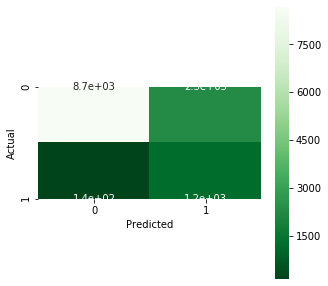

In [34]:
from sklearn.ensemble import RandomForestClassifier

classif_rmd_smote = RandomForestClassifier(min_samples_leaf=150)
classif_rmd_smote.fit(X_train_smote, Y_train_smote)
Y_pred_rmf_smote = classif_rmd_smote.predict(X_test)
accgoal_rmf_smote = accuracy_score(Y_pred_rmf_smote, Y_test)
cmatrix_rmf_smote = confusion_matrix(Y_test, Y_pred_rmf_smote)
print(cmatrix_rmf_smote)
print('The log determinant is:', np.log10(np.linalg.det(cmatrix_rmf_smote)))
print("The accuracy goal is:", round(accgoal_rmf_smote*100,2),'%')


sns.heatmap(cmatrix_rmf_smote, annot=True, square=True, cmap = 'Greens_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (5.0, 5.0)    # ... and big plots

# Empirical Sigmoid SMOTE

CPU times: user 2h 4min 55s, sys: 56min 43s, total: 3h 1min 38s
Wall time: 51min 41s
[[9950 1031]
 [ 371 1005]]
The log determinant is: 6.983050860501344
The accuracy goal is: 88.65 %


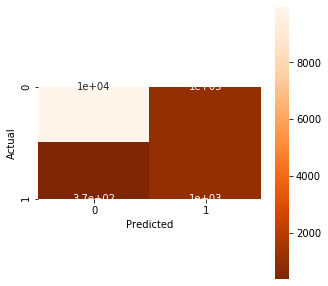

In [35]:
class Empirical_Classifier:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __empirical_class(self, z):
        return 0.5*(1.0 + z/(1.0+np.abs(z)))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__empirical_class(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__empirical_class(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print('floss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__empirical_class(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

model = Empirical_Classifier(lr=0.1, num_iter=300000)
%time model.fit(X_train_smote, Y_train_smote)
Y_pred_emp_smote = model.predict(X_test)
params = model.theta

accgoal_emp_smote = accuracy_score(Y_pred_emp_smote, Y_test)
c_matrix_emp_smote = confusion_matrix(Y_test, Y_pred_emp_smote)
print(c_matrix_emp_smote)
print('The log determinant is:', np.log10(np.linalg.det(c_matrix_emp_smote)))
print("The accuracy goal is:", round(accgoal_emp_smote*100,2),'%')

sns.heatmap(c_matrix_emp_smote, annot=True, square=True, cmap = 'Oranges_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (8.0, 8.0)    # ... and big plots

# Artificial Neural Networks SMOTE

Epoch 1/100
38350/38350 [==============================] - 2s 58us/step - loss: 0.3443 - accuracy: 0.8419
Epoch 2/100
38350/38350 [==============================] - 2s 41us/step - loss: 0.2968 - accuracy: 0.8650
Epoch 3/100
38350/38350 [==============================] - 2s 42us/step - loss: 0.2875 - accuracy: 0.8699
Epoch 4/100
38350/38350 [==============================] - 2s 41us/step - loss: 0.2800 - accuracy: 0.8727
Epoch 5/100
38350/38350 [==============================] - 2s 41us/step - loss: 0.2746 - accuracy: 0.8748
Epoch 6/100
38350/38350 [==============================] - 2s 41us/step - loss: 0.2716 - accuracy: 0.8777
Epoch 7/100
38350/38350 [==============================] - 2s 41us/step - loss: 0.2692 - accuracy: 0.8791
Epoch 8/100
38350/38350 [==============================] - 2s 41us/step - loss: 0.2668 - accuracy: 0.8787
Epoch 9/100
38350/38350 [==============================] - 2s 41us/step - loss: 0.2650 - accuracy: 0.8800
Epoch 10/100
38350/38350 [====================

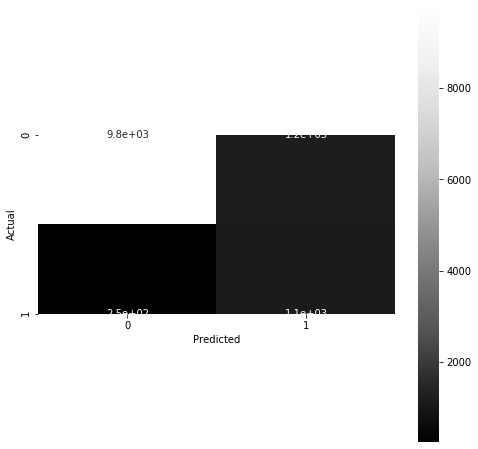

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense# Initialising the ANN
"Activation functions: 'sigmoid', 'tanh', 'relu'"
classifier = Sequential()# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])# Fitting the ANN to the Training set
classifier.fit(X_train_smote, Y_train_smote, batch_size = 32, epochs = 100)

# Predicting the Test set results
Y_pred_ann_smote = classifier.predict(X_test)
Y_pred_ann_smote = (Y_pred_ann_smote > 0.5)
accgoal_ann_smote = accuracy_score(Y_pred_ann_smote, Y_test)

cmatrix_ann_smote = confusion_matrix(Y_test, Y_pred_ann_smote) # rows = truth, cols = prediction
print(cmatrix_ann_smote)
print('The log determinant is:', np.log10(np.linalg.det(cmatrix_ann_smote)))
print("The accuracy goal is:", round(accgoal_ann_smote*100,2),'%')


sns.heatmap(cmatrix_ann_smote, annot=True, square=True, cmap = 'Greys_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (8.0, 8.0)    # ... and big plots

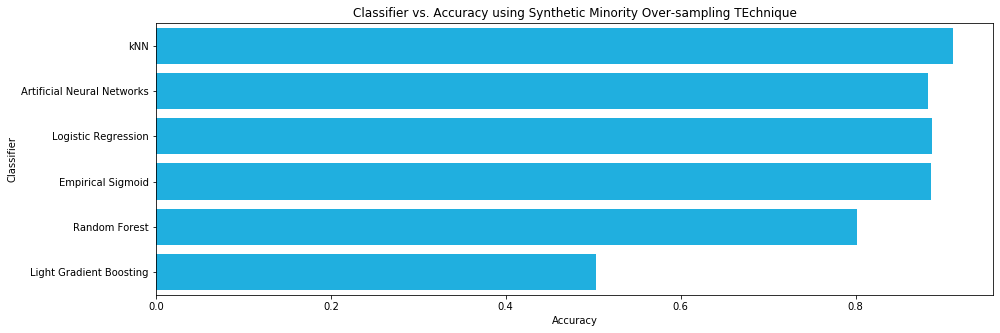

In [38]:
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
log_entry = pd.DataFrame([['kNN',accgoaal_knn_smote],['Artificial Neural Networks',accgoal_ann_smote],['Logistic Regression',accgoal_log_smote],['Empirical Sigmoid', accgoal_emp_smote], ['Random Forest', accgoal_rmf_smote], ['Light Gradient Boosting',accgoal_gb_smote]], columns=log_cols)
        #metric_entry = pd.DataFrame([[precision,recall,f1_score,roc_auc]], columns=metrics_cols)
log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier vs. Accuracy using Synthetic Minority Over-sampling TEchnique')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="deepskyblue")  
plt.rcParams['figure.figsize'] = (15.0, 5.0)    # ... and big plots
plt.show()

# Cross validation 